In [16]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def parseMatOutput(filePath):
    mat = scipy.io.loadmat(filePath)
    ### order ###
    # mids, rhoFull, dxAvgFull, structureFull, hybridFull, windingFull, backtrackingFull, backtrackingFullRaw, collistionsFull, collisionsFullRaw
    
    #output full
    output_full, output, params = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    output_full.index = mat['Data'][0][0][0][0]
    for n,i in enumerate(mat['Data'][0][0][1]): #rhoFull
        output_full['data_'+str(n)] = n
    
    #output
    output['nParticles'] = [i[0] for i in mat['Data'][0][0][10]]
    output['xEnd'] = [i[0] for i in mat['Data'][0][0][11]]
    output['xEndPremature'] = [i[0] for i in mat['Data'][0][0][12]]
    output['tTaken'] = [pd.Series(i).mean() for i in mat['Data'][0][0][13].T]
    
    #parameters  
    param_temp = [i[0] for i in mat['Data'][0][0][14][0][0]]
    param_clean = []
    for i in param_temp:
        if type(i) == np.ndarray:           
            param_clean.append(i[0])
        else:
            param_clean.append(i)
            
    names = ['sigma','outOfBound','rpa12Cleavage','minRange','RNAPbubble','hybridFile','saveHistOnly','nRuns','tMax','dt','structureFile','c','dist','v5end','addProb','vInt','preTermProb','preTermDist','backtrackingVelocity','rnt1Cleavage','structure2consider','structureStrength','hybridStrength','name']
    params.index = names
    params['run'] = param_clean
    
    return output, params



path = "/mnt/c/Users/tturo/OneDrive - University of Edinburgh/model_RNAPI_matlab/20221221_termination_analytical_tools_update/Data/"

df00_output = pd.DataFrame()
for f in os.listdir(path):
    if f.endswith(".mat"):
        output, params = parseMatOutput(path+f)
        
#         print(output)
#         print(params)
        
        params = params.to_dict()['run']
        
        #coefficient to multiply nRuns 
        if params['tMax'] == 6000:
            coef = (150 * 0.5) / params['nRuns']
        else:
            exit("tMax different than 6000")
        
        data = {
            'time'        : params['tMax'],
            'c'           : params['c'],
            'dist'        : params['dist'],
            'v5end'       : params['v5end'],
            'addProb'     : params['addProb'],
            'vInt'        : params['vInt'],
            'preTermProb' : params['preTermProb'],
            'preTermDist' : params['preTermDist'],
            'nParticles'    : output['nParticles'].mean(),
            'xEnd'          : output['xEnd'].sum() * coef,
            'xEndPremature' : output['xEndPremature'].sum() * coef,
            'tTaken'        : output['tTaken'].mean()
        }
        
        
        df00_output[params['name']] = data
        
df00_output

,discrete_0.1,discrete_0.2,discrete_0.3,discrete_0.4,discrete_0.5,discrete_0.6,discrete_0.7,discrete_0.8,discrete_0.9,discrete_1.0,...,discrete_0.9_term_0.0001,discrete_0.9_term_0.001,discrete_0.9_term_0.01,discrete_0.9_term_0.1,discrete_0.9_term_1,discrete_1.0_term_0.0001,discrete_1.0_term_0.001,discrete_1.0_term_0.01,discrete_1.0_term_0.1,discrete_1.0_term_1
time,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000
c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
dist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
v5end,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
addProb,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,...,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,1.000000,1.000000,1.00000,1.000000
vInt,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
preTermProb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000100,0.001000,0.010000,0.100000,1.000000,0.000100,0.001000,0.010000,0.10000,1.000000
preTermDist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.00000,6750.000000
nParticles,13.204937,24.883000,34.709312,43.491187,51.248125,57.796625,64.554312,71.376125,76.679000,81.432250,...,76.549875,76.775000,76.237500,72.483937,45.133125,81.086750,82.108562,81.263000,77.80875,48.049500
xEnd,40181.250000,75501.562500,105051.562500,131559.375000,154809.375000,174356.250000,193931.250000,210121.875000,223223.437500,237051.562500,...,224690.625000,223842.187500,221915.625000,200667.187500,74910.937500,237206.250000,237778.125000,235078.125000,213459.37500,80193.750000


In [17]:
#processivity
df00_output = df00_output.T
df00_output['processivity'] = df00_output['xEnd'] / (df00_output['xEnd'] + df00_output['xEndPremature'])
df00_output = df00_output.T
df00_output

,discrete_0.1,discrete_0.2,discrete_0.3,discrete_0.4,discrete_0.5,discrete_0.6,discrete_0.7,discrete_0.8,discrete_0.9,discrete_1.0,...,discrete_0.9_term_0.0001,discrete_0.9_term_0.001,discrete_0.9_term_0.01,discrete_0.9_term_0.1,discrete_0.9_term_1,discrete_1.0_term_0.0001,discrete_1.0_term_0.001,discrete_1.0_term_0.01,discrete_1.0_term_0.1,discrete_1.0_term_1
time,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
v5end,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
addProb,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000,...,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000
vInt,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
preTermProb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000100,0.001000,0.010000,0.100000,1.000000,0.000100,0.001000,0.010000,0.100000,1.000000
preTermDist,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000,6750.000000
nParticles,13.204937,24.883000,34.709312,43.491187,51.248125,57.796625,64.554312,71.376125,76.679000,81.432250,...,76.549875,76.775000,76.237500,72.483937,45.133125,81.086750,82.108562,81.263000,77.808750,48.049500
xEnd,40181.250000,75501.562500,105051.562500,131559.375000,154809.375000,174356.250000,193931.250000,210121.875000,223223.437500,237051.562500,...,224690.625000,223842.187500,221915.625000,200667.187500,74910.937500,237206.250000,237778.125000,235078.125000,213459.375000,80193.750000


<AxesSubplot:>

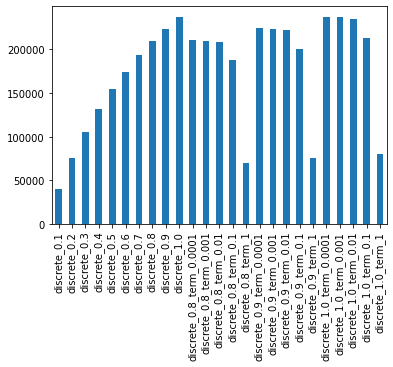

In [23]:
df00_output.T['xEnd'].plot.bar()

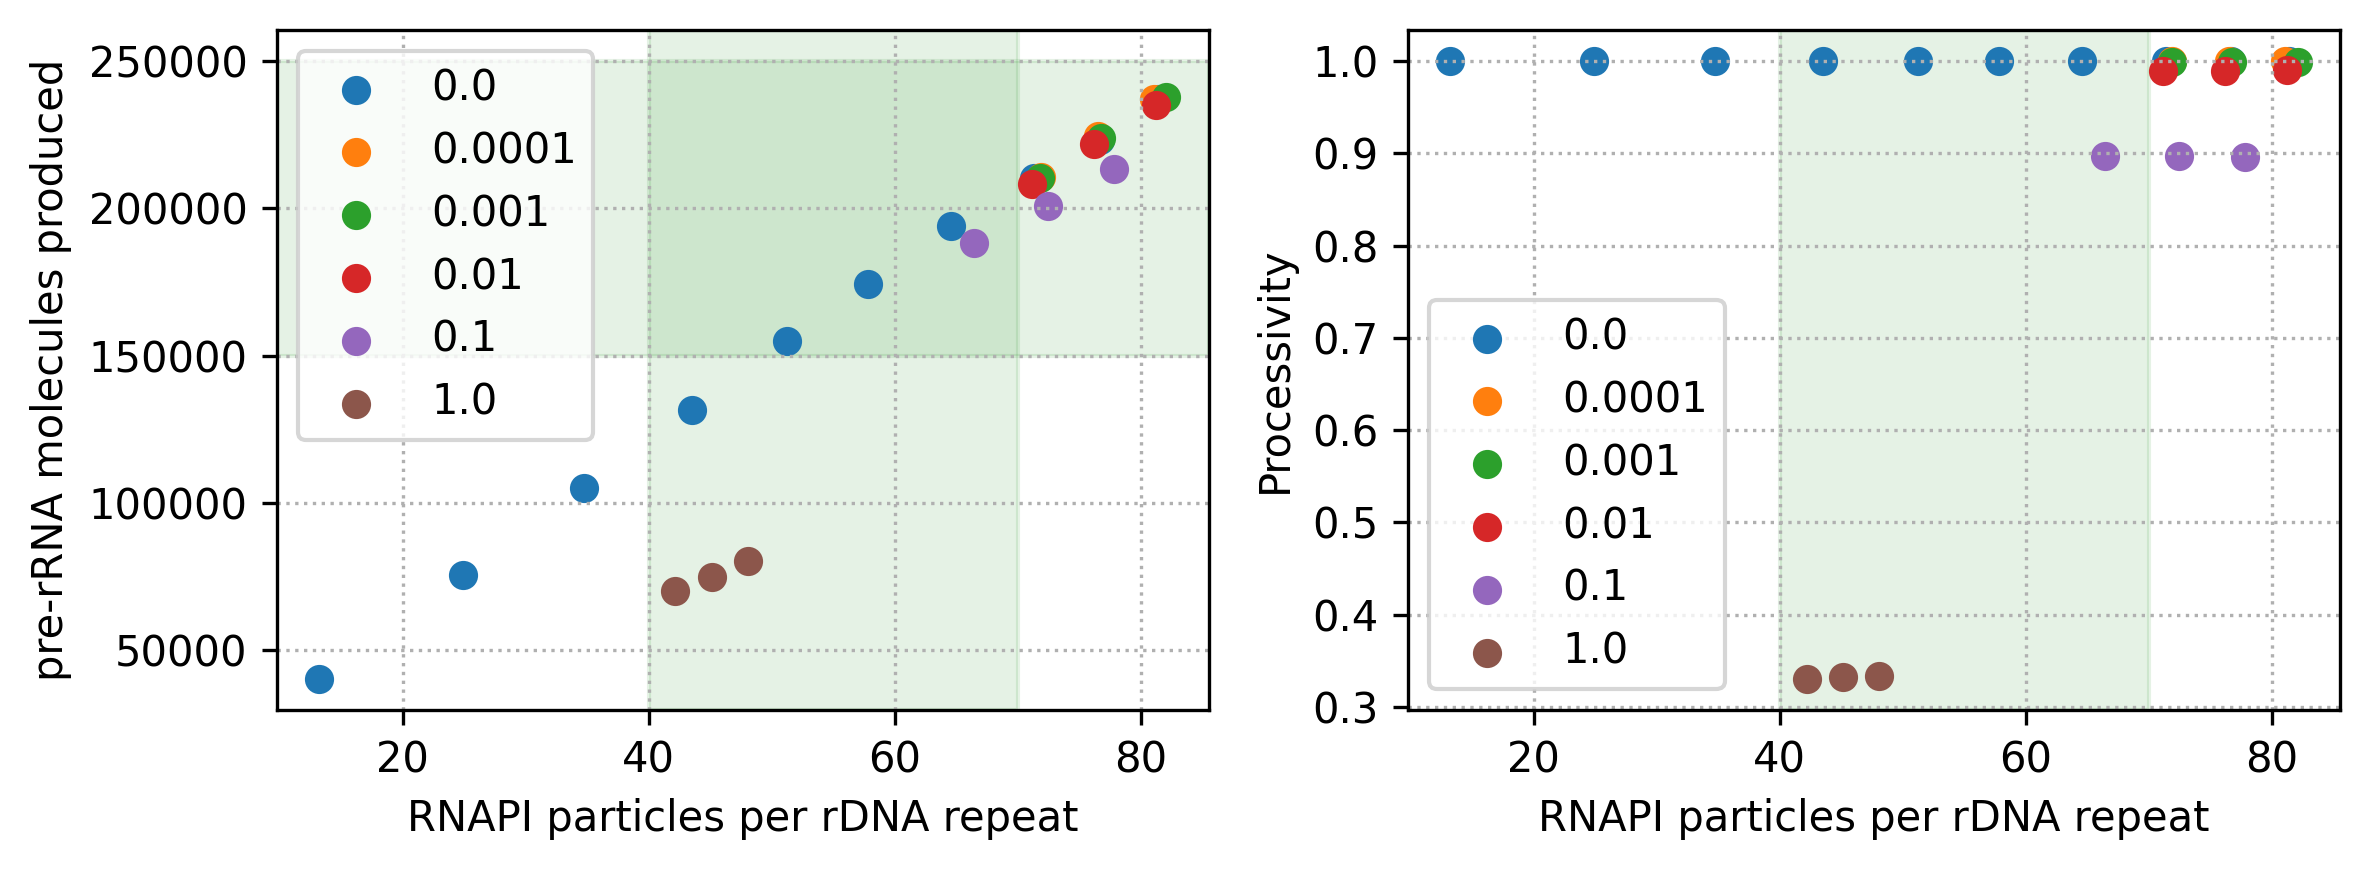

In [52]:
figsize=(8,3)
texts = []
data = df00_output.T
title = ''

fig = plt.figure(figsize=figsize, dpi=300)

#panel 1
ax1 = fig.add_subplot(1,2,1)
ax1.axvspan(40,70,color='green',alpha=0.1)
ax1.axhspan(150000,250000,color='green',alpha=0.1)

for group, df_temp in data.groupby('preTermProb'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['xEnd'].tolist()
    ax1.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax1.legend()
ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI particles per rDNA repeat')
ax1.set_ylabel('pre-rRNA molecules produced')

#panel 2
ax1 = fig.add_subplot(1,2,2)
ax1.axvspan(40,70,color='green',alpha=0.1)
# ax1.axhspan(0,1,color='green',alpha=0.1)

for group, df_temp in data.groupby('preTermProb'):
    a = df_temp['nParticles'].tolist()
    b = df_temp['processivity'].tolist()
    ax1.scatter(x=a ,y=b ,label=group, cmap="paired")
#     for x, y, s in zip(a, b, df_temp.index.tolist()):
#         texts.append(plt.text(x, y, s))

ax1.legend()
ax1.grid(True,ls="dotted")
ax1.set_xlabel('RNAPI particles per rDNA repeat')
ax1.set_ylabel('Processivity')

plt.title(title)
plt.tight_layout()
# adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))
plt.show()